<a href="https://colab.research.google.com/github/NishiAjmera/notebooks/blob/main/DIY_Gemini_SDK_and_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [1]:
%pip install -q -U "google-genai>=1.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 12.0 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [5]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [6]:
from google import genai

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Now select the model you want to use in this guide, either by selecting one in the list or writing it down. Keep in mind that some models, like the 2.5 ones are thinking models and thus take slightly more time to respond (cf. [thinking notebook](./Get_started_thinking.ipynb) for more details and in particular learn how to switch the thiking off).

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

In [10]:
MODEL_ID="gemini-2.5-flash" # @param ["gemini-2.5-flash", "gemini-2.5-pro", "gemini-2.0-flash", "gemini-2.5-flash-lite-preview-06-17"] {"allow-input":true, isTemplate: true}

In [11]:
from IPython.display import Markdown

response = client.models.generate_content(
  model=MODEL_ID,
  contents="Can you give me a algorithm for binary search?")

display(Markdown(response.text))

Binary search is an efficient algorithm for finding an item from a **sorted list of items**. It works by repeatedly dividing in half the portion of the list that could contain the item, until you've narrowed down the possible locations to just one.

### Prerequisites

1.  **The list (array) must be sorted.** This is non-negotiable for binary search.
2.  **Direct access to elements** (like in an array).

### The Algorithm (Iterative Approach - Most Common)

Let's define the algorithm for finding a `target` value in a sorted array `arr` of `n` elements.

**Variables:**
*   `low`: An index pointer, initially pointing to the first element (index `0`).
*   `high`: An index pointer, initially pointing to the last element (index `n-1`).
*   `mid`: The middle index of the current search space.

**Steps:**

1.  **Initialize:**
    *   Set `low = 0` (the first index of the array).
    *   Set `high = n - 1` (the last index of the array).

2.  **Loop while `low` is less than or equal to `high`:**
    *   **Calculate `mid`:**
        *   `mid = low + (high - low) / 2`
        *   *Note:* Using `(low + high) / 2` is common, but `low + (high - low) / 2` is safer to prevent potential integer overflow if `low` and `high` are very large numbers, though this is less of a concern in many modern languages with larger integer types.

    *   **Compare `arr[mid]` with `target`:**
        *   **If `arr[mid] == target`:**
            *   The target is found! Return `mid` (the index where the target is located).
        *   **If `arr[mid] < target`:**
            *   The target, if it exists, must be in the **right half** of the current search space.
            *   Update `low = mid + 1`. (We can exclude `mid` itself because we already checked it).
        *   **If `arr[mid] > target`:**
            *   The target, if it exists, must be in the **left half** of the current search space.
            *   Update `high = mid - 1`. (We can exclude `mid` itself because we already checked it).

3.  **If the loop finishes** (i.e., `low` becomes greater than `high`):
    *   This means the target was not found in the array. Return a special value like `-1` to indicate not found.

### Pseudocode

```
Function BinarySearch(arr, target):
  low = 0
  high = length(arr) - 1

  While low <= high:
    mid = low + (high - low) / 2  // Integer division

    If arr[mid] == target:
      Return mid // Target found at this index

    Else if arr[mid] < target:
      low = mid + 1 // Target is in the right half

    Else: // arr[mid] > target
      high = mid - 1 // Target is in the left half

  Return -1 // Target not found
```

### Example Walkthrough

Let's find `target = 23` in the sorted array `arr = [2, 5, 8, 12, 16, 23, 38, 56, 72, 91]`

*   `n = 10`
*   `low = 0`, `high = 9`

**Iteration 1:**
*   `mid = 0 + (9 - 0) / 2 = 4` (integer division)
*   `arr[4] = 16`
*   `16 < 23` -> Target is in the right half.
*   `low = 4 + 1 = 5`

**Iteration 2:**
*   `low = 5`, `high = 9`
*   `mid = 5 + (9 - 5) / 2 = 5 + 4 / 2 = 5 + 2 = 7`
*   `arr[7] = 56`
*   `56 > 23` -> Target is in the left half.
*   `high = 7 - 1 = 6`

**Iteration 3:**
*   `low = 5`, `high = 6`
*   `mid = 5 + (6 - 5) / 2 = 5 + 1 / 2 = 5 + 0 = 5`
*   `arr[5] = 23`
*   `23 == 23` -> Target found!
*   Return `mid = 5`.

### Time and Space Complexity

*   **Time Complexity:** **O(log n)**
    *   With each comparison, the algorithm halves the search space. This logarithmic behavior makes it extremely fast for large lists.
*   **Space Complexity:** **O(1)** (for the iterative approach)
    *   It only uses a few variables (`low`, `high`, `mid`) regardless of the input size, so it requires constant extra space.

### Recursive Approach (Alternative)

Binary search can also be implemented recursively.

```
Function BinarySearchRecursive(arr, target, low, high):
  If low > high:
    Return -1 // Target not found (base case for termination)

  mid = low + (high - low) / 2

  If arr[mid] == target:
    Return mid // Target found

  Else if arr[mid] < target:
    Return BinarySearchRecursive(arr, target, mid + 1, high) // Search right half

  Else: // arr[mid] > target
    Return BinarySearchRecursive(arr, target, low, mid - 1) // Search left half

// To call it initially:
// BinarySearchRecursive(arr, target, 0, length(arr) - 1)
```

*   **Space Complexity (Recursive):** **O(log n)**
    *   Due to the recursion stack, which can go `log n` levels deep in the worst case.

Binary search is a fundamental algorithm taught in computer science due to its simplicity, elegance, and efficiency for sorted data.

## Set the temperature

Every prompt you send to the model includes parameters that control how the model generates responses. Use a `types.GenerateContentConfig` to set these, or omit it to use the defaults.

Temperature controls the degree of randomness in token selection. Use higher values for more creative responses, and lower values for more deterministic responses.

Note: Although you can set the `candidate_count` in the generation_config, 2.0 and later models will only return a single candidate at the this time.

In [15]:
from google.genai import types

response = client.models.generate_content(
    model=MODEL_ID,
    contents='Give me a numbered list of cat facts.',
    config=types.GenerateContentConfig(
        max_output_tokens=2000,
        temperature=2.0,
        stop_sequences=['\n6'] # Limit to 5 facts.
    )
)

display(Markdown(response.text))

Here's a numbered list of cat facts:

1.  **Whiskers are more than just cute:** Cat whiskers (vibrissae) are highly sensitive sensory tools. They help cats navigate, determine if they can fit through small spaces, and even hunt in the dark by detecting changes in air currents.
2.  **They can't taste sweet things:** Due to a genetic mutation, domestic cats lack the necessary taste receptors to perceive sweetness, making them one of the few mammals unable to taste sugar.
3.  **Purring has multiple meanings:** While often associated with contentment, cats also purr when they are stressed, anxious, hungry, or even when injured as a form of self-soothing or communication.
4.  **They sleep for two-thirds of their lives:** Cats spend approximately 70% of their lives asleep. This behavior is linked to their predatory nature, as they conserve energy for hunting (even if their "prey" is just a toy mouse).
5.  **Each nose print is unique:** Similar to human fingerprints, a cat's nose pad has a unique pattern of ridges and bumps.

## Have a chat

The Gemini API enables you to have freeform conversations across multiple turns.

The [ChatSession](https://ai.google.dev/api/python/google/generativeai/ChatSession) class will store the conversation history for multi-turn interactions.

In [16]:
chat = client.chats.create(model=MODEL_ID)

In [20]:
response = chat.send_message(
    message="Hey I am software engieer, working on Python. I would love some cool project ideas."
)

print(response.text)

Awesome! As a Python software engineer, you're past the "to-do list" app phase. Let's get into some cooler, more challenging, or genuinely useful project ideas that can deepen your skills, explore new domains, or just be plain fun.

I'll categorize them to give you a range of options:

---

### **1. Web & API Focused**

*   **Personalized Content Aggregator/Dashboard:**
    *   **Concept:** Build a web application (Flask/FastAPI/Django) that pulls data from various APIs (news, weather, stock, RSS feeds, social media, personal metrics like fitness trackers) and presents it in a unified, customizable dashboard.
    *   **Cool Factor:** Data integration, API consumption, real-time updates (websockets?), user customization, building a clean UI.
    *   **Potential Technologies:** Flask/FastAPI/Django, Requests, Celery (for background tasks/polling), websockets (Flask-SocketIO/FastAPI's websockets), Jinja2/React/Vue for frontend, SQLite/PostgreSQL for user preferences.

*   **Smart API Prox

You can see the chat history:

In [21]:
messages = chat.get_history()
for message in messages:
  print(f"{message.role}: {message.parts[0].text}")

user: In one sentence, explain how a computer works to a young child.
model: A computer is a super-fast helper that follows your instructions to show you fun things, play games, and help you learn.
user: Okay, how about a more detailed explanation to a high schooler?
model: At its core, a computer is an electronic device designed to process information. It takes raw data as input, represents it internally as binary code (sequences of 0s and 1s, corresponding to electrical signals being on or off), and then its Central Processing Unit (CPU) executes specific instructions from software to perform calculations, logic operations, and data manipulation at incredibly high speeds. This processed data is then stored temporarily in Random Access Memory (RAM) for quick access or permanently on storage devices like hard drives, before being presented back to the user as meaningful output through devices like monitors or printers, all managed by an Operating System that coordinates hardware and so

You can keep sending messages to continue the conversation:

In [22]:
response = chat.send_message("Okay, what do you know about me?")

print(response.text)

Based on our current conversation, here's what I know about you:

1.  **You are a software engineer.**
2.  **You work with Python.**
3.  **You are looking for cool project ideas in Python.**
4.  **You were interested in explanations of how a computer works, tailored for different age groups (young child, high schooler).**

That's all the information I have! I don't retain any personal identity or history from one interaction to the next, nor do I have access to any external personal data about you. My "knowledge" is limited solely to what you've typed in this session.


## Use images in your prompt

Here you will download an image from a URL and pass that image in our prompt.

First, you download the image and load it with PIL:

In [23]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/jetpack.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  349k  100  349k    0     0  2375k      0 --:--:-- --:--:-- --:--:-- 2375k


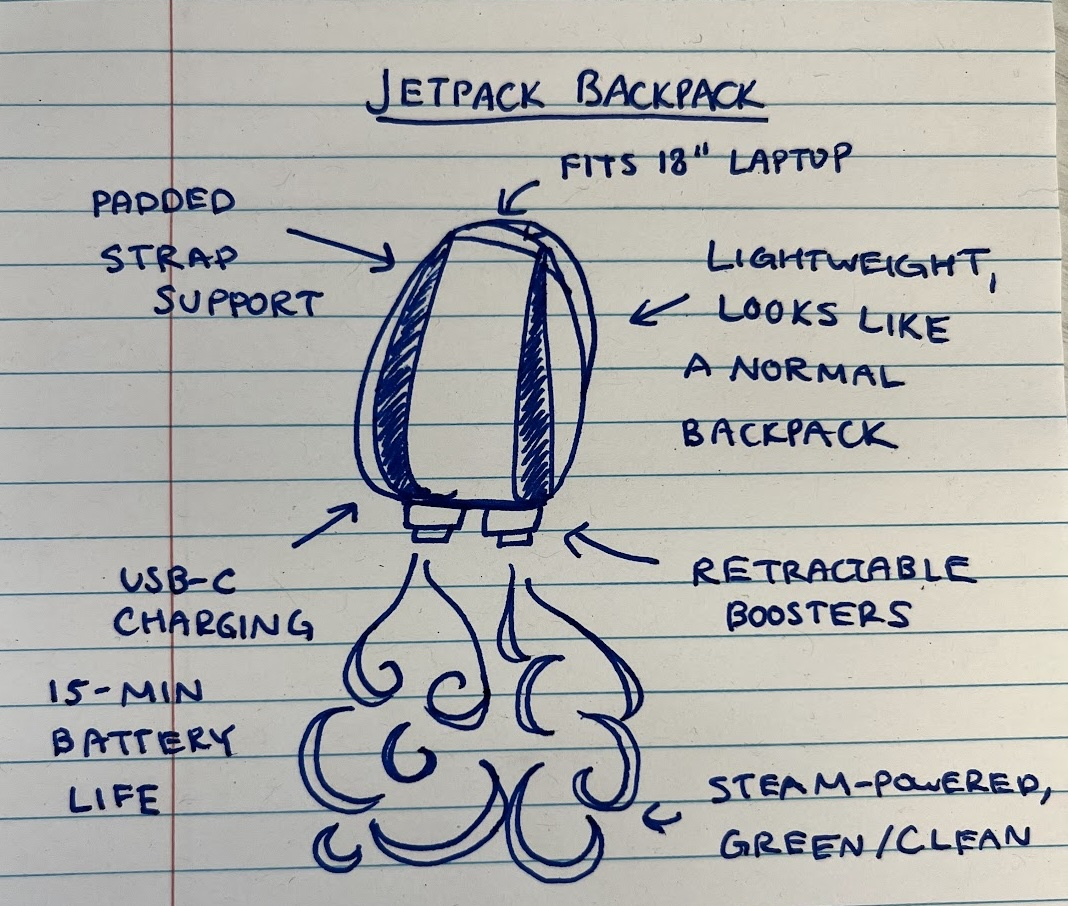

In [24]:
import PIL.Image
img = PIL.Image.open('image.jpg')
img

In [25]:
prompt = """
    This image contains a sketch of a potential product along with some notes.
    Given the product sketch, describe the product as thoroughly as possible based on what you
   see in the image, making sure to note all of the product features. Return output in json format:
   {description: description, features: [feature1, feature2, feature3, etc]}
"""

Then you can include the image in our prompt by just passing a list of items to `generate_content`.

In [26]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, img],
)

print(response.text)

```json
{
  "description": "The product is conceptualized as a 'Jetpack Backpack', designed to outwardly resemble a normal backpack while incorporating advanced propulsion capabilities. It is described as lightweight and capable of fitting an 18-inch laptop, suggesting a practical size for daily use. For user comfort, it features padded strap support. The core innovative aspect is its integrated, retractable boosters that enable flight. This propulsion system is noted as steam-powered, making it a 'green/clean' alternative. Powering the jetpack functions is a battery with a 15-minute life, which can be recharged via a USB-C connection.",
  "features": [
    "Looks like a normal backpack",
    "Lightweight",
    "Fits 18\" laptop",
    "Padded strap support",
    "Retractable boosters",
    "Steam-powered",
    "Green/Clean (environmentally friendly)",
    "USB-C charging",
    "15-min battery life"
  ]
}
```


## Use Google Search
Search grounding is particularly useful for queries that require current information or external knowledge. Using Google Search, Gemini can access nearly real-time information and better responses.

In [29]:
from IPython.display import HTML, Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents='What is the latest on wimbeldon?',
    config={"tools": [{"google_search": {}}]},
)

# print the response
display(Markdown(f"Response:\n {response.text}"))

print(f"Response: {response}")
# print the search details
print(f"Search Query: {response.candidates[0].grounding_metadata.web_search_queries}")
# urls used for grounding
print(f"Search Pages: {', '.join([site.web.title for site in response.candidates[0].grounding_metadata.grounding_chunks])}")

display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

Response:
 The Wimbledon Championships 2025 are currently underway, having started their main rounds on Monday, June 30, and are scheduled to conclude on Sunday, July 13. Preliminary rounds were played from June 23 to June 26.

In significant developments, both the defending ladies' singles champion, Barbora Krejčíková, and the 2022 winner, Elena Rybakina, have been eliminated in the third round, meaning there will be a new ladies' singles champion for the eighth consecutive year. Krejčíková was defeated by Emma Navarro, while Rybakina lost to Clara Tauson.

On the men's side, Novak Djokovic has secured his 100th Wimbledon match win and has advanced to the fourth round, continuing his pursuit of a 25th Grand Slam singles title. World No. 1 Jannik Sinner has also progressed to the fourth round without dropping a set.

Notable changes for Wimbledon 2025 include the replacement of line judges with automated electronic line judges for the first time in the tournament's history. Additionally, the men's and women's singles finals will now begin at 4:00 PM instead of the traditional 2:00 PM, aiming to enhance viewership in North and South America.

The total prize money for Wimbledon 2025 is a record £53.5 million.

Response: sdk_http_response=HttpResponse(
  headers=<dict len=10>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""The Wimbledon Championships 2025 are currently underway, having started their main rounds on Monday, June 30, and are scheduled to conclude on Sunday, July 13. Preliminary rounds were played from June 23 to June 26.

In significant developments, both the defending ladies' singles champion, Barbora Krejčíková, and the 2022 winner, Elena Rybakina, have been eliminated in the third round, meaning there will be a new ladies' singles champion for the eighth consecutive year. Krejčíková was defeated by Emma Navarro, while Rybakina lost to Clara Tauson.

On the men's side, Novak Djokovic has secured his 100th Wimbledon match win and has advanced to the fourth round, continuing his pursuit of a 25th Grand Slam singles title. World No. 1 Jannik Sinner has also progressed to the fourth round without dropping a set.

Notable changes for Wimbledon 20

The information provided may be outdated, as it is based on a knowledge cutoff. For the most current and authoritative details, please refer to the official [Model documentation](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro), which includes the latest knowledge cutoff date.

You can see that running the same prompt without search grounding gives you outdated information:

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents='What was the latest Indian Premier League match and who won?',
)

# print the response
display(Markdown(response.text))

The latest Indian Premier League match was the **Final of the IPL 2024 season**, played on **May 26, 2024**.

The match was between **Kolkata Knight Riders (KKR)** and **Sunrisers Hyderabad (SRH)**.

**Kolkata Knight Riders (KKR) won** the match dominantly to clinch their third IPL title.

## Use search in chat

Start by defining a helper function that you will use to display each part of the returned response.

In [30]:
# @title Define some helpers (run this cell)
import json

from IPython.display import display, HTML, Markdown


def show_json(obj):
  print(json.dumps(obj.model_dump(exclude_none=True), indent=2))

def show_parts(r):
  parts = r.candidates[0].content.parts
  if parts is None:
    finish_reason = r.candidates[0].finish_reason
    print(f'{finish_reason=}')
    return
  for part in r.candidates[0].content.parts:
    if part.text:
      display(Markdown(part.text))
    elif part.executable_code:
      display(Markdown(f'```python\n{part.executable_code.code}\n```'))
    else:
      show_json(part)

  grounding_metadata = r.candidates[0].grounding_metadata
  if grounding_metadata and grounding_metadata.search_entry_point:
    display(HTML(grounding_metadata.search_entry_point.rendered_content))


First try a query that needs realtime information, so you can see how the model performs _without_ Google Search.

In [ ]:
chat = client.chats.create(model=MODEL_ID)

response = chat.send_message('Who won the most recent Australia vs Chinese Taipei games?')

show_parts(response)

It depends on the sport, but in recent significant matchups between Australia and Chinese Taipei, **Australia** has generally won.

Here are some of the most recent results:

*   **Men's Football (Soccer):**
    *   **June 6, 2024:** Australia defeated Chinese Taipei 3-0 in a FIFA World Cup Qualifier.
    *   **November 21, 2023:** Australia defeated Chinese Taipei 1-0 in a FIFA World Cup Qualifier.
*   **Women's Football (Soccer):**
    *   **February 27, 2024:** Australia defeated Chinese Taipei 5-0 in an Olympic Qualifier.
*   **Men's Basketball:**
    *   **February 23, 2024:** Australia defeated Chinese Taipei 90-72 in a FIBA Asia Cup Qualifier.
*   **Women's Basketball:**
    *   **February 26, 2024:** Australia defeated Chinese Taipei 99-52 in a FIBA Women's Asia Cup Qualifier.

So, in the most recent games across these major sports, Australia won.

Now set up a new chat session that uses the `google_search` tool.  The `show_parts` helper will display the text output as well as any Google Search queries used in the results.

In [ ]:
search_tool = {'google_search': {}}

soccer_chat = client.chats.create(
    model=MODEL_ID,
    config={'tools': [search_tool]}
)

response = soccer_chat.send_message('Who won the most recent Australia vs Chinese Taipei games?')

show_parts(response)

The most recent Australia vs Chinese Taipei games vary by sport:

**Futsal (Women's):**
In their most recent game on May 10, 2025, Chinese Taipei defeated the Australian Women's Futsal Team 1-0 in the AFC Women's Futsal Asian Cup 2025™.

**Volleyball (Men's):**
Australia defeated Chinese Taipei 3-0 in the AVC Nations Cup (Men) on June 2, 2025.

**Volleyball (Women's):**
Chinese Taipei defeated Australia Women 3-0 in the AVC Nations Cup (Women) on June 7, 2025.

**Basketball (U18 Men's):**
Australia overwhelmingly defeated Chinese Taipei 113-48 in the U18 FIBA Asia Championship on September 4, 2024.

**Basketball (U17 Women's):**
Australia played Chinese Taipei in the Round of 16 of the FIBA U17 Women's Basketball World Cup 2024 on July 17, 2024. The search results do not specify the winner of this match but indicate that Australia defeated Chinese Taipei in their previous overall head-to-head records.

**Soccer (Men's):**
Australia has a strong historical record against Chinese Taipei in soccer, having never lost in their past three meetings, with the most recent match being a 5-1 victory for Australia on June 7, 2021, during the World Cup Qualification Asia.

**Soccer (Women's):**
In a friendly match on December 7, 2024, Australia (W) defeated Chinese Taipei W by a score of 6-0. Australia Women have also won all 6 of their games against Chinese Taipei (w) since 2008.

As you are using a `chat` session, you can ask the model follow-up questions too.

In [ ]:
response = soccer_chat.send_message('Who scored the goals?')

show_parts(response)

To tell you who scored the goals, I need to know which sport you're referring to. Could you please specify if you're asking about soccer (football), futsal, or another sport?

## Plot search results


In this example you can see how to use the Google Search tool with code generation in order to plot results.

In [31]:
search_tool = {'google_search': {}}

movie_chat = client.chats.create(
    model=MODEL_ID,
    config={'tools': [search_tool]}
)

response = movie_chat.send_message('Generate some Python code to plot the runtimes of the 10 more recent Denis Villeneuve movies.')

show_parts(response)

To plot the runtimes of the 10 most recent Denis Villeneuve movies, we will use Python with the `matplotlib` library. The runtimes for his films are:

*   **Dune: Part Two (2024):** 2 hours, 46 minutes (166 minutes)
*   **Dune: Part One (2021):** 2 hours, 35 minutes (155 minutes)
*   **Blade Runner 2049 (2017):** 2 hours, 43 minutes (163 minutes)
*   **Arrival (2016):** 1 hour, 56 minutes (116 minutes)
*   **Sicario (2015):** 2 hours, 1 minute (121 minutes)
*   **Enemy (2013):** 1 hour, 30 minutes (90 minutes)
*   **Prisoners (2013):** 2 hours, 33 minutes (153 minutes)
*   **Incendies (2010):** 2 hours, 11 minutes (131 minutes)
*   **Polytechnique (2009):** 1 hour, 17 minutes (77 minutes)
*   **Maelström (2000):** 1 hour, 28 minutes (88 minutes)

Here is the Python code to generate the plot:



```python
import matplotlib.pyplot as plt

# Data for the 10 most recent Denis Villeneuve movies
movies = {
    "Dune: Part Two (2024)": 166,
    "Dune: Part One (2021)": 155,
    "Blade Runner 2049 (2017)": 163,
    "Arrival (2016)": 116,
    "Sicario (2015)": 121,
    "Enemy (2013)": 90,
    "Prisoners (2013)": 153,
    "Incendies (2010)": 131,
    "Polytechnique (2009)": 77,
    "Maelström (2000)": 88
}

# Sort movies by release year (key) to ensure chronological order on the plot
sorted_movies = sorted(movies.items(), key=lambda item: int(item[0].split('(')[1][:4]))
movie_titles = [movie[0] for movie in sorted_movies]
runtimes = [movie[1] for movie in sorted_movies]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(movie_titles, runtimes, color='skyblue')

# Add labels and title
plt.xlabel("Movie Title (Year)")
plt.ylabel("Runtime (Minutes)")
plt.title("Runtimes of Denis Villeneuve's 10 Most Recent Movies")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()
```

First review the supplied code to make sure it does what you expect, then copy it here to try out the chart.

import matplotlib.pyplot as plt

# Data for the 10 most recent Denis Villeneuve movies
movies = {
    "Dune: Part Two (2024)": 166,
    "Dune: Part One (2021)": 155,
    "Blade Runner 2049 (2017)": 163,
    "Arrival (2016)": 116,
    "Sicario (2015)": 121,
    "Enemy (2013)": 90,
    "Prisoners (2013)": 153,
    "Incendies (2010)": 131,
    "Polytechnique (2009)": 77,
    "Maelström (2000)": 88
}

# Sort movies by release year (key) to ensure chronological order on the plot
sorted_movies = sorted(movies.items(), key=lambda item: int(item[0].split('(')[1][:4]))
movie_titles = [movie[0] for movie in sorted_movies]
runtimes = [movie[1] for movie in sorted_movies]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(movie_titles, runtimes, color='skyblue')

# Add labels and title
plt.xlabel("Movie Title (Year)")
plt.ylabel("Runtime (Minutes)")
plt.title("Runtimes of Denis Villeneuve's 10 Most Recent Movies")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
p

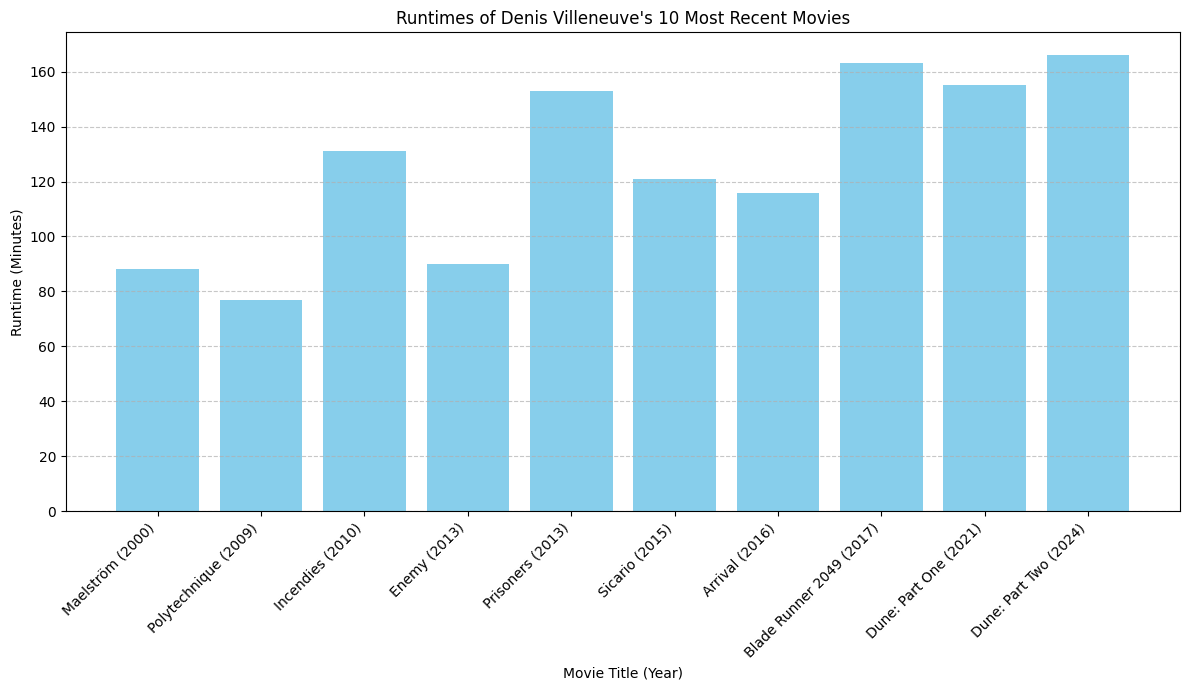

In [32]:
import re

matchFound = re.search(r"python\n(.*?)```", response.text, re.DOTALL)
print(matchFound.group(1))
if matchFound:
  code = matchFound.group(1)
  exec(code)

One feature of using a chat conversation to do this is that you can now ask the model to make changes.

import matplotlib.pyplot as plt

# Data for the 10 most recent Denis Villeneuve movies
movies = {
    "Dune: Part Two (2024)": 166,
    "Dune: Part One (2021)": 155,
    "Blade Runner 2049 (2017)": 163,
    "Arrival (2016)": 116,
    "Sicario (2015)": 121,
    "Enemy (2013)": 90,
    "Prisoners (2013)": 153,
    "Incendies (2010)": 131,
    "Polytechnique (2009)": 77,
    "Maelström (2000)": 88
}

# Sort movies by release year (key) to ensure chronological order on the plot
sorted_movies = sorted(movies.items(), key=lambda item: int(item[0].split('(')[1][:4]))
movie_titles = [movie[0] for movie in sorted_movies]
runtimes = [movie[1] for movie in sorted_movies]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(movie_titles, runtimes, color='skyblue')

# Add labels and title
plt.xlabel("Movie Title (Year)")
plt.ylabel("Runtime (Minutes)")
plt.title("Runtimes of Denis Villeneuve's 10 Most Recent Movies")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
p

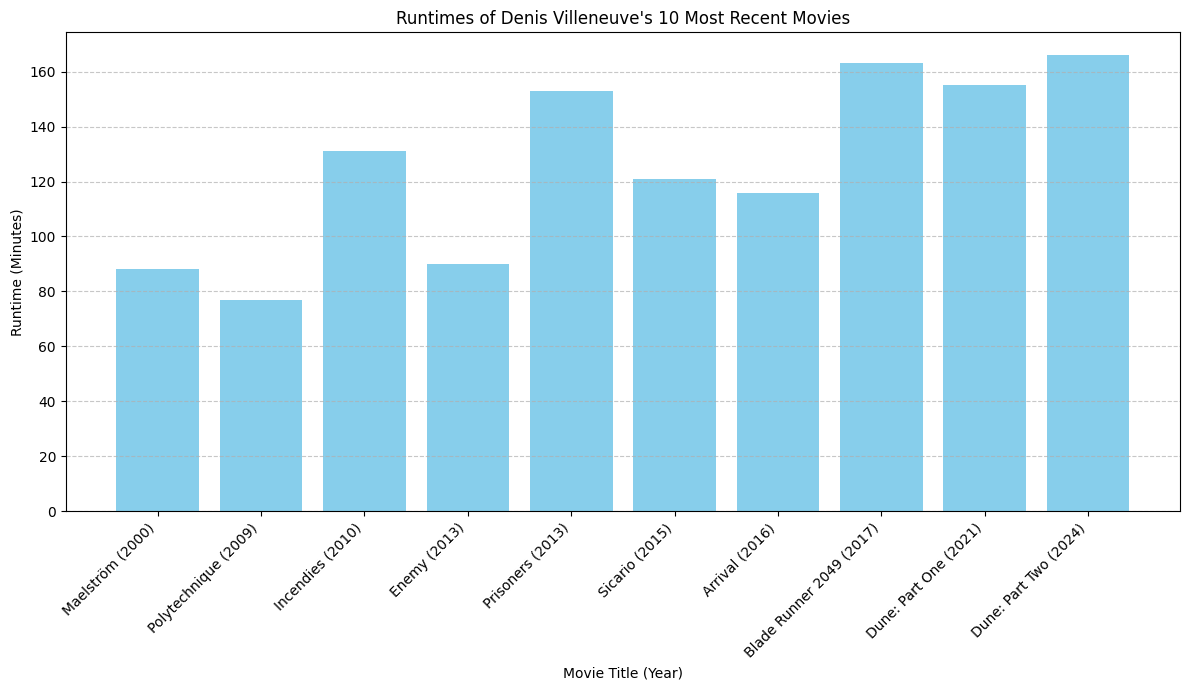

In [33]:
import re

matchFound = re.search(r"python\n(.*?)```", response.text, re.DOTALL)
print(matchFound.group(1))
if matchFound:
  code = matchFound.group(1)
  exec(code)

In [34]:
response = movie_chat.send_message('Looks great! Can you give the chart a dark theme instead?')

show_parts(response)

To give the chart a dark theme, you can use `matplotlib.pyplot.style.use('dark_background')`. This built-in style in Matplotlib sets the background to black and adjusts text and line colors to white for better visibility on a dark background.

Here's the updated Python code:



```python
import matplotlib.pyplot as plt

# Data for the 10 most recent Denis Villeneuve movies
movies = {
    "Dune: Part Two (2024)": 166,
    "Dune: Part One (2021)": 155,
    "Blade Runner 2049 (2017)": 163,
    "Arrival (2016)": 116,
    "Sicario (2015)": 121,
    "Enemy (2013)": 90,
    "Prisoners (2013)": 153,
    "Incendies (2010)": 131,
    "Polytechnique (2009)": 77,
    "Maelström (2000)": 88
}

# Sort movies by release year (key) to ensure chronological order on the plot
sorted_movies = sorted(movies.items(), key=lambda item: int(item[0].split('(')[1][:4]))
movie_titles = [movie[0] for movie in sorted_movies]
runtimes = [movie[1] for movie in sorted_movies]

# Apply the 'dark_background' style
plt.style.use('dark_background') [1, 5]

# Create the bar plot
plt.figure(figsize=(12, 7))
plt.bar(movie_titles, runtimes, color='skyblue')

# Add labels and title
plt.xlabel("Movie Title (Year)")
plt.ylabel("Runtime (Minutes)")
plt.title("Runtimes of Denis Villeneuve's 10 Most Recent Movies")
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping

# Display the plot
plt.show()
```

Again, always be sure to review code generated by the model before running it.

# Live API

### Select a model

The [Gemini 2.0 Flash Live](https://ai.google.dev/gemini-api/docs/models#live-api) model works with the Live API to enable low-latency bidirectional voice and video interactions with Gemini. The model can process text, audio, and video input, and it can provide text and audio output.

In [ ]:
MODEL = "gemini-2.0-flash-live-001"

### Import

Import all the necessary modules.

In [ ]:
import asyncio
import base64
import contextlib
import datetime
import os
import json
import wave
import itertools

from IPython.display import display, Audio

from google import genai
from google.genai import types

## Text to Text

The simplest way to use the Live API is as a text-to-text chat interface, but it can do **a lot** more than this.

In [ ]:
config={
    "response_modalities": ["TEXT"]
}

async with client.aio.live.connect(model=MODEL, config=config) as session:
  message = "Hello? Gemini are you there?"
  print("> ", message, "\n")
  await session.send_client_content(
        turns={"role": "user", "parts": [{"text": message}]}, turn_complete=True
  )

  # For text responses, When the model's turn is complete it breaks out of the loop.
  turn = session.receive()
  async for chunk in turn:
    if chunk.text is not None:
      print(f'- {chunk.text}')

>  Hello? Gemini are you there? 

- Yes, I am
-  here! How can I help you today?



## Simple text to audio

The simplest way to playback the audio in Colab, is to write it out to a `.wav` file. So here is a simple wave file writer:

In [ ]:
@contextlib.contextmanager
def wave_file(filename, channels=1, rate=24000, sample_width=2):
    with wave.open(filename, "wb") as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(rate)
        yield wf

The next step is to tell the model to return audio by setting `"response_modalities": ["AUDIO"]` in the `LiveConnectConfig`.  

When you get a response from the model, then you write out the data to a `.wav` file.

In [ ]:
config={
    "response_modalities": ["AUDIO"]
}

async def async_enumerate(aiterable):
  n=0
  async for item in aiterable:
    yield n, item
    n+=1


async with client.aio.live.connect(model=MODEL, config=config) as session:
  file_name = 'audio.wav'
  with wave_file(file_name) as wav:
    message = "Hello? Gemini are you there?"
    print("> ", message, "\n")
    await session.send_client_content(
        turns={"role": "user", "parts": [{"text": message}]}, turn_complete=True
    )

    turn = session.receive()
    async for n,response in async_enumerate(turn):
      if response.data is not None:
        wav.writeframes(response.data)

        if n==0:
          print(response.server_content.model_turn.parts[0].inline_data.mime_type)
        print('.', end='')


display(Audio(file_name, autoplay=True))


>  Hello? Gemini are you there? 

audio/pcm;rate=24000
............

## Towards Async Tasks


The real power of the Live API is that it's real time, and interruptable. You can't get that full power in a simple sequence of steps. To really use the functionality you will move the `send` and `recieve` operations (and others) into their own [async tasks](https://docs.python.org/3/library/asyncio-task.html).

Because of the limitations of Colab this tutorial doesn't totally implement the interactive async tasks, but it does implement the next step in that direction:

- It separates the `send` and `receive`, but still runs them sequentially.  
- In the next tutorial you'll run these in separate `async` tasks.


Setup a quick logger to make debugging easier (switch to `setLevel('DEBUG')` to see debugging messages).

In [ ]:
import logging

logger = logging.getLogger('Live')
logger.setLevel('INFO')

The class below implements the interaction with the Live API.

In [ ]:
class AudioLoop:
  def __init__(self, turns=None,  config=None):
    self.session = None
    self.index = 0
    self.turns = turns
    if config is None:
      config={
          "response_modalities": ["AUDIO"]}
    self.config = config

  async def run(self):
    logger.debug('connect')
    async with client.aio.live.connect(model=MODEL, config=self.config) as session:
      self.session = session

      async for sent in self.send():
        # Ideally send and recv would be separate tasks.
        await self.recv()

  async def _iter(self):
    if self.turns:
      for text in self.turns:
        print("message >", text)
        yield text
    else:
      print("Type 'q' to quit")
      while True:
        text = await asyncio.to_thread(input, "message > ")

        # If the input returns 'q' quit.
        if text.lower() == 'q':
          break

        yield text

  async def send(self):
    async for text in self._iter():
      logger.debug('send')

      # Send the message to the model.
      await self.session.send_client_content(
        turns={"role": "user", "parts": [{"text": text}]}, turn_complete=True
      )
      logger.debug('sent')
      yield text

  async def recv(self):
    # Start a new `.wav` file.
    file_name = f"audio_{self.index}.wav"
    with wave_file(file_name) as wav:
      self.index += 1

      logger.debug('receive')

      # Read chunks from the socket.
      turn = self.session.receive()
      async for n, response in async_enumerate(turn):
        logger.debug(f'got chunk: {str(response)}')

        if response.data is None:
          logger.debug(f'Unhandled server message! - {response}')
        else:
          wav.writeframes(response.data)
          if n == 0:
            print(response.server_content.model_turn.parts[0].inline_data.mime_type)
          print('.', end='')

      print('\n<Turn complete>')

    display(Audio(file_name, autoplay=True))
    await asyncio.sleep(2)


There are 3 methods worth describing here:

**`run` - The main loop**

This method:

- Opens a `websocket` connecting to the Live API.
- Calls the initial `setup` method.
- Then enters the main loop where it alternates between `send` and `recv` until send returns `False`.
- The next tutorial will demonstrate how to stream media and run these asynchronously.

**`send` - Sends input text to the api**

The `send` method collects input text from the user, wraps it in a `client_content` message (an instance of `BidiGenerateContentClientContent`), and sends it to the model.

If the user sends a `q` this method returns `False` to signal that it's time to quit.

**`recv` - Collects audio from the API and plays it**

The `recv` method collects audio chunks in a loop and writes them to a `.wav` file. It breaks out of the loop once the model sends a `turn_complete` method, and then plays the audio.

To keep things simple in Colab it collects **all** the audio before playing it. [Other examples](#next_steps) demonstrate how to play audio as soon as you start to receive it (using `PyAudio`), and how to interrupt the model (implement input and audio playback on separate tasks).

### Run

Run it:


In [ ]:
await AudioLoop(['Hello', "What's your name?"]).run()

message > Hello
audio/pcm;rate=24000
.........
<Turn complete>


message > What's your name?
audio/pcm;rate=24000
............
<Turn complete>


## Working with resumable sessions

Session resumption allows you to return to a previous interaction with the Live API by sending the last session handle you got from the previous session.

When you set your session to be resumable, the session information keeps stored on the Live API for up to 24 hours. In this time window, you can resume the conversation and refer to previous information you have shared with the model.


### Helper functions

Start by creating the helper functions for your resumable interaction with the Live API. It will include:

In [ ]:
import asyncio
import traceback
from asyncio.exceptions import CancelledError

last_handle = None

MODEL = "gemini-2.0-flash-live-001"

client = genai.Client(api_key=GOOGLE_API_KEY)

async def async_enumerate(aiterable):
  n=0
  async for item in aiterable:
    yield n, item
    n+=1


def show_response(response):
    new_handle = None
    if text := response.text:
        print(text, end="")
    else:
      print(response.model_dump_json(indent=2, exclude_none=True))
    if response.session_resumption_update:
        new_handle = response.session_resumption_update.new_handle
    return new_handle


async def clock():
  time = 0
  while True:
    await asyncio.sleep(60)
    time += 1
    print(f"{time}:00")


async def recv(session):
  global last_handle
  try:
    while True:
        async for response in session.receive():
            new_handle = show_response(response)
            if new_handle:
                last_handle = new_handle
  except asyncio.CancelledError:
    pass


async def send(session):
  while True:
      message = await asyncio.to_thread(input, "message > ")
      if message.lower() == "q":
          break
      await session.send_client_content(turns={
          'role': 'user',
          'parts': [{'text': message}]
      })


async def async_main(last_handle=None):
  config = types.LiveConnectConfig.model_validate({
      "response_modalities": ["TEXT"],
      "session_resumption": {
          'handle': last_handle,
      }
  })
  try:
    async with (
        client.aio.live.connect(model=MODEL, config=config) as session,
        asyncio.TaskGroup() as tg
    ):
        clock_task = tg.create_task(clock())
        recv_task = tg.create_task(recv(session))
        send_task = tg.create_task(send(session))
        await send_task
        raise asyncio.CancelledError()
  except asyncio.CancelledError:
      pass
  except ExceptionGroup as EG:
      traceback.print_exception(EG)

Now you can start interacting with the Live API (type `q` to finish the conversation):

In [ ]:
await async_main()

message > hey
{
  "session_resumption_update": {}
}
Hey there! How can I help you today?
{
  "server_content": {
    "generation_complete": true
  }
}
{
  "server_content": {
    "turn_complete": true
  },
  "usage_metadata": {
    "prompt_token_count": 9,
    "response_token_count": 11,
    "total_token_count": 20,
    "prompt_tokens_details": [
      {
        "modality": "TEXT",
        "token_count": 9
      }
    ],
    "response_tokens_details": [
      {
        "modality": "TEXT",
        "token_count": 11
      }
    ]
  }
}
{
  "session_resumption_update": {
    "new_handle": "Cih3c3BxdTZmaTg4dTJjZDFjdGk5ODdpZzB5NXNvOGNrMDdhem5kM2Vx",
    "resumable": true
  }
}
message > who is the president of India ?
{
  "session_resumption_update": {}
}
The current president of India is Droupadi Murmu.
{
  "server_content": {
    "generation_complete": true
  }
}
{
  "server_content": {
    "turn_complete": true
  },
  "usage_metadata": {
    "prompt_token_count": 82,
    "response_token_

With the session resumption you have the session handle to refer to your previous sessions. In this example, the handle is saved at the `last_handle` variable as below:

In [ ]:
last_handle

NameError: name 'last_handle' is not defined

Now you can start a new Live API session, but this time pointing to a handle from a previous session. Also, to test you could gather information from the previous session, you will ask the model what was the second question you asked before (in this example, it was "what is the capital of Brazil?"). You can see the Live API recovering that information:

In [ ]:
await async_main(last_handle)

## Use search in the Multimodal Live API

The Search tool can be used in a live streaming context to have the model formulate grounded responses during the conversation.

In [ ]:
# Live API only works with v1alpha API and with the gemini-2.0-flash-exp model at the moment

client = genai.Client(http_options={'api_version': 'v1alpha'})

LIVE_MODEL_ID = "gemini-2.0-flash-exp"

### Define some helpers

To use the bi-directional streaming API in Colab, you will buffer the audio stream. Define a `play_response` helper function to do the buffering, and once the audio for the current turn has completed, display an IPython audio widget.

As each of the following examples only use a single prompt, also define a `run` helper to wrap the setup and prompt execution steps into a single function call. This helper takes a `config` argument that will be added to the `generation_config`, so that you can toggle the Search tool between examples.

In [ ]:
# @title Helper functions for the Live API (run this cell)

import asyncio
import io
import json
import re
import time
import wave

import numpy as np
from IPython.display import Audio, display


DEFAULT_OUTPUT_RATE = 24000
BASE_MODEL_CONFIG = {
    # Here you can change the model's output mode between either audio or text.
    # While this code expects an audio stream, text should work, but the stream
    # may interleave with the `Buffering....` text.
    'response_modalities': ['AUDIO']
}

async def play_response(stream):
  """Buffer audio output and display a widget. Returns the streamed responses."""
  turn_buf = io.BytesIO()
  sample_rate = DEFAULT_OUTPUT_RATE

  all_responses = []

  print('Buffering', end='')
  async for msg in stream.receive():
    all_responses.append(msg)

    if text:=msg.text:
      print(text)
    if audio_data := msg.data:
      turn_buf.write(audio_data)
      if m := re.search(
          'rate=(?P<rate>\d+)',
          msg.server_content.model_turn.parts[0].inline_data.mime_type
      ):
            sample_rate = int(m.group('rate'))

    elif tool_call := msg.tool_call:
      # Handle tool-call requests. Here is where you would implement
      # custom tool code, but for this example, all tools respond 'ok'.
      for fc in tool_call.function_calls:
        print('Tool call', end='')
        tool_response = genai.types.LiveClientToolResponse(
            function_responses=[genai.types.FunctionResponse(
                name=fc.name,
                id=fc.id,
                response={'result': 'ok'},
            )]
        )
        await stream.send(input=tool_response)

    print('.', end='')

  print()

  # Play the audio
  if turn_buf.tell():
    audio = np.frombuffer(turn_buf.getvalue(), dtype=np.int16)
    display(Audio(audio, autoplay=True, rate=sample_rate))
  else:
    print('No audio :(')
    print(f'  {len(all_responses)=}')

  return all_responses


async def run(query, config=None):
  # Add any tools or other generation config.
  config = BASE_MODEL_CONFIG | (config or {})

  # Establish a live session. While this context manager is active, the
  # conversation will continue.
  async with client.aio.live.connect(model=LIVE_MODEL_ID, config=config) as strm:

    # Send the prompt.
    await strm.send(input=query, end_of_turn=True)
    # Handle the model response.
    responses = await play_response(strm)

    return responses

### Stream with the Search tool

First, execute a query _without_ the Search tool to observe the model's response to a time-sensitive query.

Note that the Multimodal Live API is a 2-way streaming API, but to simplify running in a notebook, each audio response is buffered and played once it has been fully streamed, so you will need to wait a few seconds before the response starts to play.

In [ ]:
await run('Who won the skateboarding gold medals in the 2024 olympics?');

<ipython-input-22-8d15eaa56993>:81: DeprecationWarning: The `session.send` method is deprecated and will be removed in a future version (not before Q3 2025).
Please use one of the more specific methods: `send_client_content`, `send_realtime_input`, or `send_tool_response` instead.
  await strm.send(input=query, end_of_turn=True)


Buffering

.......

.......

.......

.......

.......

.......

.....

.......

.......

....


Now re-run with the Search tool enabled.

In [ ]:
responses = await run('Who won the skateboarding gold medals in the 2024 olympics?', {'tools': [search_tool]})

<ipython-input-22-8d15eaa56993>:81: DeprecationWarning: The `session.send` method is deprecated and will be removed in a future version (not before Q3 2025).
Please use one of the more specific methods: `send_client_content`, `send_realtime_input`, or `send_tool_response` instead.
  await strm.send(input=query, end_of_turn=True)


Buffering

.

.

.......

.......

.....

.......

.......

.....

.......

.....

.......

.......

......

..........


If you wish to see the full output that was returned, you can enable `show_output` here and run this cell. It includes the complete audio binary data, so it is off by default.

In [ ]:
show_output = False

if show_output:
  for msg in responses:
    print(msg.model_dump(exclude_none=True))

### Search with custom tools

In the Multimodal Live API, the Search tool can be used in conjunction with other tools, including function calls that you provide to the model.

In this example, you define a function `set_climate` that takes 2 parameters, `mode` (`hot`, `cold`, etc) and `strength` (0-10), and ask the model to set the climate control based on the live weather in the location you specify.

In [ ]:
set_climate_tool = {'function_declarations': [{
    'name': 'set_climate',
    'description': 'Switches the local climate control equipment to the specified parameters.',
    'parameters': {
      'type': 'OBJECT',
      'properties': {
        # Define the "mode" argument.
        'mode': {
            'type': 'STRING',
            'enum': [
              # Define the possible values for "mode".
              "hot",
              "cold",
              "fan",
              "off",
            ],
            'description': 'Mode for the climate unit - whether to heat, cool or just blow air.',
        },
        # Define the "strength" argument.
        'strength': {
            'type': 'INTEGER',
            'description': 'Intensity of the climate to apply, 0-10 (0 is off, 10 is MAX).',
        },
      },
    },
  },
]}

search_tool = {'google_search': {}}

tools = {'tools': [search_tool, set_climate_tool]}

responses = await run("Look up the weather in Paris using search and set my climate control appropriately.", tools)

<ipython-input-22-8d15eaa56993>:81: DeprecationWarning: The `session.send` method is deprecated and will be removed in a future version (not before Q3 2025).
Please use one of the more specific methods: `send_client_content`, `send_realtime_input`, or `send_tool_response` instead.
  await strm.send(input=query, end_of_turn=True)


Buffering

.

.

<ipython-input-22-8d15eaa56993>:55: DeprecationWarning: The `session.send` method is deprecated and will be removed in a future version (not before Q3 2025).
Please use one of the more specific methods: `send_client_content`, `send_realtime_input`, or `send_tool_response` instead.
  await stream.send(input=tool_response)


.....Tool call...

.......

.......

.......

.......

.......

.......

.......

.....

.......

.......

.......

.....

....


Now inspect the `tool_call` response(s) you received during the conversation.

In [ ]:
for r in responses:
  if tool := r.tool_call:
    for fn in tool.function_calls:
      args = ', '.join(f'{k}={v}' for k, v in fn.args.items())
      print(f'{fn.name}({args})  # id={fn.id}')

set_climate(strength=3, mode=cold)  # id=function-call-12389289546227236364
